# Altair Debugging Guide

In this notebook we show you common debugging techniques that you can use if you run into issues with Altair. 

You can jump to the following sections:

* [Installation and Setup](#Installation) when Altair is not installed correctly
* [Display Issues](#Display-Troubleshooting) when you don't see a chart
* [Invalid Specifications](#Invalid-Specifications) when you get an error
* [Properties are Being Ignored](#Properties-are-Being-Ignored) when you don't see any errors or warnings
* [Asking for Help](#Asking-for-Help) when you get stuck
* [Reporting Issues](#Reporting-Issues) when you find a bug

In addition to this notebook, you might find the [Frequently Asked Questions](https://altair-viz.github.io/user_guide/faq.html) and [Display Troubleshooting](https://altair-viz.github.io/user_guide/troubleshooting.html) guides helpful. 

_This notebook is part of the [data visualization curriculum](https://github.com/uwdata/visualization-curriculum)._

## Installation

These instructions follow [the Altair documentation](https://altair-viz.github.io/getting_started/installation.html) but focus on some specifics for this series of notebooks. 

In every notebook, we will import the [Altair](https://github.com/altair-viz/altair) and [Vega Datasets](https://github.com/altair-viz/vega_datasets) packages. If you are running this notebook on [Colab](https://colab.research.google.com), Altair and Vega Datasets should be preinstalled and ready to go. The notebooks in this series are designed for Colab but should also work in Jupyter Lab or the Jupyter Notebook (the notebook requires a bit more setup [described below](#Special-Setup-for-the-Jupyter-Notebook)) but additional packages are required. 

If you are running in Jupyter Lab or Jupyter Notebooks, you have to install the necessary packages by running the following command in your terminal.

```bash
pip install altair vega_datasets
```

Or if you use [Conda](https://conda.io)

```bash
conda install -c conda-forge altair vega_datasets
```

You can run command line commands from a code cell by prefixing it with `!`. For example, to install Altair and Vega Datasets with [Pip](https://pip.pypa.io/), you can run the following cell.

In [47]:
!pip install altair vega_datasets

In [1]:
import altair as alt
from vega_datasets import data 

### Make sure you are Using the Latest Version of Altair

If you are running into issues with Altair, first make sure that you are running the latest version. To check the version of Altair that you have installed, run the cell below. 

In [2]:
alt.__version__

'2.4.1'

To check what the latest version of altair is, go to [this page](https://pypi.org/project/altair/) or run the cell below (requires Python 3).

In [50]:
import urllib.request, json 
with urllib.request.urlopen("https://pypi.org/pypi/altair/json") as url:
    print(json.loads(url.read().decode())['info']['version'])

2.4.1


If you are not running the latest version, you can update it with `pip`. You can update Altair and Vega Datasets by running this command in your terminal.

```
pip install -U altair vega_datasets
```

### Try Making a Chart

Now you can create an Altair chart.

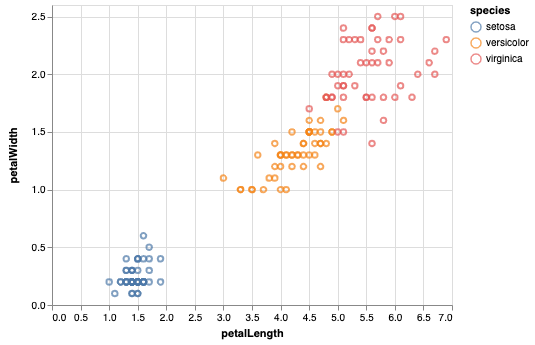

In [51]:
iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

### Special Setup for the Jupyter Notebook

If you are running in Colab or Jupyter Lab, you should be seeing a chart. If you are running in the Jupyter Notebook, you need to install an additional dependency and tell Altair to render charts for the Notebook.

The additional dependency is the `vega` package, which you can install by running this command in your terminal

```bash
pip install vega
```

Then activate the Notebook renderer in a notebook cell

```python
# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

```

These instruction follow [the instructions on the Altair website](https://altair-viz.github.io/getting_started/installation.html#installation-notebook).

## Display Troubleshooting

If you are having issues with seeing a chart, make sure your setup is correct by following the [debugging instruction above](#installation). If you are still having issues, follow the [instruction about debugging display issues in the Altair documentation](https://altair-viz.github.io/user_guide/troubleshooting.html).

### Non Existent Fields

A common error is [accidentally using a field that does not exit](https://altair-viz.github.io/user_guide/troubleshooting.html#plot-displays-but-the-content-is-empty). 

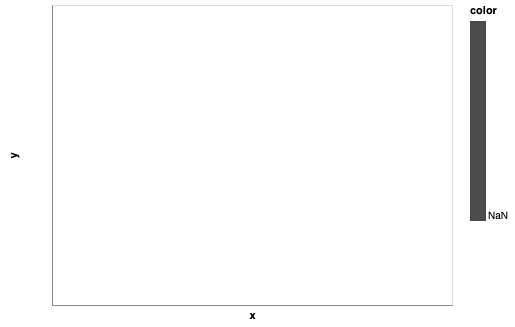

In [64]:
import pandas as pd

df = pd.DataFrame({'x': [1, 2, 3],
                     'y': [3, 1, 4]})

alt.Chart(df).mark_point().encode(
    x='x:Q',
    y='y:Q',
    color='color:Q'  # <-- this field does not exist in the data!
)

Check the spelling of your files and print the data source to confirm that the data and fields exist. For instance, here you see that `color` is not a vaid field. 

In [54]:
df.head()

,x,y
0,1,3
1,2,1
2,3,4


## Invalid Specifications

Another common issue is creating an invalid specification and getting an error.

### Invalid Properties

Altair might show an `SchemaValidationError` or `ValueError`. Read the error message carefully. Usually it will tell you what is going wrong. 

For example, if you forget the mark type, you will see this `SchemaValidationError`. 

In [62]:
alt.Chart(data.cars()).encode(
    y='Horsepower'
)

SchemaValidationError: Invalid specification

        altair.vegalite.v2.api.Chart, validating 'required'

        'mark' is a required property
        

Chart({
  data:      Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
  0            12.0          8         307.0       130.0              18.0   
  1            11.5          8         350.0       165.0              15.0   
  2            11.0          8         318.0       150.0              18.0   
  3            12.0          8         304.0       150.0              16.0   
  4            10.5          8         302.0       140.0              17.0   
  5            10.0          8         429.0       198.0              15.0   
  6             9.0          8         454.0       220.0              14.0   
  7             8.5          8         440.0       215.0              14.0   
  8            10.0          8         455.0       225.0              14.0   
  9             8.5          8         390.0       190.0              15.0   
  10           17.5          4         133.0       115.0               NaN   
  11           11.5          8         350.0      

Or if you use a non-existent channel, you get a `ValueError`. 

In [63]:
alt.Chart(data.cars()).mark_point().encode(
    z='Horsepower'
)

ValueError: Unrecognized encoding channel 'z'

## Properties are Being Ignored

Altair might ignore a property that you specified. In the chart below, we are using a `text` channel, which is only compatible with `mark_text`. You do not see an error or a warning about this in the notebook. However, the underlying Vega-Lite library will show a warning in the browser console.  Press <kbd>Alt</kbd>+<kbd>Cmd</kbd>+<kbd>I</kbd> on Mac or <kbd>Alt</kbd>+<kbd>Ctrl</kbd>+<kbd>I</kbd> on Windows and Linux to open the developer tools and click on the `Console` tab. When you run the example in the cell below, you will see a the following warning.

```
WARN text dropped as it is incompatible with "bar".
```

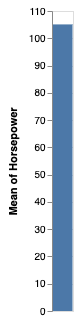

In [67]:
alt.Chart(data.cars()).mark_bar().encode(
    y='mean(Horsepower)',
    text='mean(Acceleration)'
)

If you find yourself debugging issues related to Vega-Lite, you can open the chart in the [Vega Editor](https://vega.github.io/editor/) either by clicking on the "Open in Vega Editor" link at the bottom of the chart or in the action menu (click to open) at the top right of a chart. The Vega Editor provides additional debugging but you will be writing Vega-Lite JSON instead of Altair in Python.

**Note**: The Vega Editor may be using a newer version of Vega-Lite and so the behavior may vary.

## Asking for Help

If you find a problem with Altair and get stuck, you can ask a question on Stack Overflow. Ask your question with the `altair` and `vega-lite` tags. You can find a list of questions people have asked before [here](https://stackoverflow.com/questions/tagged/altair). 

## Reporting Issues

If you find a problem with Altair and believe it is a bug, please [create an issue in the Altair GitHub repo](https://github.com/altair-viz/altair/issues/new) with a description of your problem. If you believe the issue is related to the underlying Vega-Lite library, please [create an issue in the Vega-Lite GitHub repo](https://github.com/vega/vega-lite/issues/new).